In [1]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data_path=(r'/content/drive/My Drive/memory_save')


data=np.load(data_path + '/data-memory-save.npy')
target=np.load(data_path + '/target-memory-save.npy')

Mounted at /content/drive


In [2]:
print(data.shape)
print(target.shape)

(4000,)
(4000, 2)


In [3]:
print(data[0])
print(target[0])

/content/drive/My Drive/animal/dog/keeshond_68.jpg
[1. 0.]


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │       102,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,188 (543.70 KB)

 Trainable params: 139,188 (543.70 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import cv2
import os

img_size=50

def batcher(data,target):

    global img_size,batch_size

    def preprocess(img_name):

        img=cv2.imread(os.path.abspath(img_name))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(img_size,img_size))/255

        return img.reshape(img_size,img_size,1)

    while(True):

        data_new=[]
        target_new=[]

        #inds=np.arange(i,i+batch_size)
        inds=np.random.randint(0,len(data),batch_size)
        #print(inds)
        for index in inds:

            data_new.append(preprocess(data[index]))
            target_new.append(target[index])


        yield np.array(data_new),np.array(target_new)

In [6]:
inds=np.random.randint(0,4000,32)
print(inds)

[2472 1498 2857 3961 3933  911 1002 2819 2006 3606 2122 2446 2846 1875
  108  779 1755  990 2175 3829 1660 3191  331   63 2664 1557 3199 1506
 1463 2080 3193 1775]


In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [8]:
print(train_data[:10])

['/content/drive/My Drive/animal/cat/2013-03-20_415629347587370399.jpg'
 '/content/drive/My Drive/animal/cat/cat.4038.jpg'
 '/content/drive/My Drive/animal/cat/2013-03-15_411909273533820837.jpg'
 '/content/drive/My Drive/animal/dog/saint_bernard_145.jpg'
 '/content/drive/My Drive/animal/cat/cat.65.jpg'
 '/content/drive/My Drive/animal/dog/keeshond_91.jpg'
 '/content/drive/My Drive/animal/dog/pomeranian_138.jpg'
 '/content/drive/My Drive/animal/dog/miniature_pinscher_108.jpg'
 '/content/drive/My Drive/animal/cat/cat.4618.jpg'
 '/content/drive/My Drive/animal/cat/cat.4833.jpg']


In [9]:
500//32

15

In [10]:
#model.fit(data,target,epochs=20,validation_split=0.2,batch_size=32)

In [11]:
batch_size=32

history = model.fit(batcher(train_data,train_target),epochs=20,validation_data=batcher(test_data,test_target),batch_size=batch_size,
         steps_per_epoch=len(train_data)//batch_size,validation_steps=len(test_data)//batch_size)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 597s 6s/step - accuracy: 0.5438 - loss: 0.6846 - val_accuracy: 0.6425 - val_loss: 0.6303
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.6500 - loss: 0.6285 - val_accuracy: 0.6750 - val_loss: 0.5872
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.6654 - loss: 0.6148 - val_accuracy: 0.6662 - val_loss: 0.6270
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 740ms/step - accuracy: 0.6851 - loss: 0.5946 - val_accuracy: 0.7013 - val_loss: 0.5795
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 783ms/step - accuracy: 0.7255 - loss: 0.5473 - val_accuracy: 0.7450 - val_loss: 0.5163
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 815ms/step - accuracy: 0.7339 - loss: 0.5230 - val_accuracy: 0.7513 - val_loss: 0.5050
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 821ms/step - accuracy: 0.7588 - loss: 0.4850 - val_accuracy: 0.7250 - val_loss: 0.5440
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 828ms/step - accuracy: 0.7982 - loss: 0.4578 

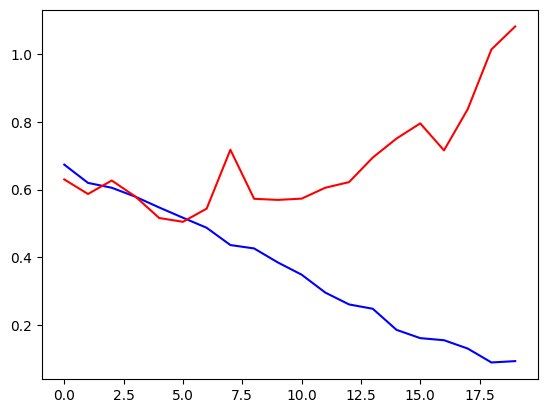

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

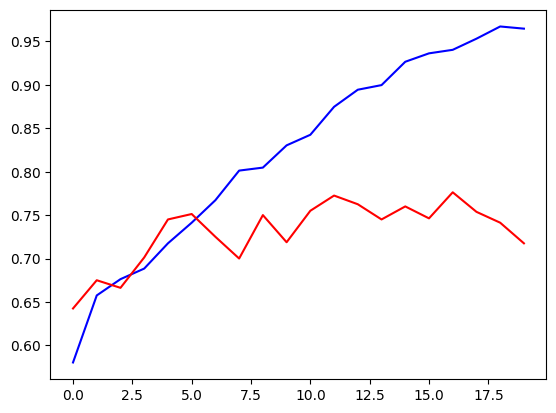

In [13]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')